# Coursework Project 
## DATA71011 Understanding Data and their Environment

### Lime Team

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
data = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Understanding Data and their Environment/Assignment 2/dataFINAL/final-data-udate.csv')

/var/folders/9q/x_qkm_295r77cyh7zn22pj3h0000gn/T/ipykernel_9817/2282083190.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Understanding Data and their Environment/Assignment 2/dataFINAL/final-data-udate.csv')


#### Data preparation

In [103]:
columns_to_drop = [
    'DayOfWeek', 'Date', 'CompetitionOpenSinceMonth', 
    'CompetitionOpenSinceYear', 'Promo2SinceWeek', 
    'Promo2SinceYear', 'PromoInterval', 
    'CompetitionOpenDate', 'PromoDate'
]
# Drop the columns
salesFINAL = data.drop(columns=columns_to_drop)

# Display the cleaned DataFrame summary
salesFINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   Sales                1017209 non-null  int64  
 2   Customers            1017209 non-null  int64  
 3   Open                 1017209 non-null  int64  
 4   Promo                1017209 non-null  int64  
 5   StateHoliday         1017209 non-null  object 
 6   SchoolHoliday        1017209 non-null  int64  
 7   StoreType            1017209 non-null  object 
 8   Assortment           1017209 non-null  object 
 9   CompetitionDistance  1017209 non-null  int64  
 10  Promo2               1017209 non-null  int64  
 11  DiffTimeMonths       1017209 non-null  int64  
 12  DiffPromoTimeMonths  509178 non-null   float64
dtypes: float64(1), int64(9), object(3)
memory usage: 100.9+ MB


In [105]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Transform the 'StateHoliday' column
salesFINAL['StateHoliday_encoded'] = label_encoder.fit_transform(salesFINAL['StateHoliday'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'0': 0, 'a': 1, 'b': 2, 'c': 3}


In [107]:
# Transform the 'StoreType' column
salesFINAL['StoreType_encoded'] = label_encoder.fit_transform(salesFINAL['StoreType'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'a': 0, 'b': 1, 'c': 2, 'd': 3}


In [109]:
# Transform the 'Assortment' column
salesFINAL['Assortment_encoded'] = label_encoder.fit_transform(salesFINAL['Assortment'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'a': 0, 'b': 1, 'c': 2}


In [111]:
salesFINAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Store                 1017209 non-null  int64  
 1   Sales                 1017209 non-null  int64  
 2   Customers             1017209 non-null  int64  
 3   Open                  1017209 non-null  int64  
 4   Promo                 1017209 non-null  int64  
 5   StateHoliday          1017209 non-null  object 
 6   SchoolHoliday         1017209 non-null  int64  
 7   StoreType             1017209 non-null  object 
 8   Assortment            1017209 non-null  object 
 9   CompetitionDistance   1017209 non-null  int64  
 10  Promo2                1017209 non-null  int64  
 11  DiffTimeMonths        1017209 non-null  int64  
 12  DiffPromoTimeMonths   509178 non-null   float64
 13  StateHoliday_encoded  1017209 non-null  int64  
 14  StoreType_encoded     1017209 non-

In [113]:
columns_drop = [
    'Store', 'StoreType', 'Assortment', 
    'StateHoliday'
]
# Drop the columns
dataFOREST = salesFINAL.drop(columns=columns_drop)
dataFOREST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Sales                 1017209 non-null  int64  
 1   Customers             1017209 non-null  int64  
 2   Open                  1017209 non-null  int64  
 3   Promo                 1017209 non-null  int64  
 4   SchoolHoliday         1017209 non-null  int64  
 5   CompetitionDistance   1017209 non-null  int64  
 6   Promo2                1017209 non-null  int64  
 7   DiffTimeMonths        1017209 non-null  int64  
 8   DiffPromoTimeMonths   509178 non-null   float64
 9   StateHoliday_encoded  1017209 non-null  int64  
 10  StoreType_encoded     1017209 non-null  int64  
 11  Assortment_encoded    1017209 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 93.1 MB


In [115]:
# Check for missing values in a specific column (e.g., 'DiffPromoTimeMonths')
missing_values = dataFOREST['DiffPromoTimeMonths'].isnull()
num_missing = missing_values.sum()
print(f"Number of missing values in 'DiffPromoTimeMonths': {num_missing}")

Number of missing values in 'DiffPromoTimeMonths': 508031


In [117]:
# Replace missing values in the 'DiffPromoTimeMonths' column with 0
dataFOREST['DiffPromoTimeMonths'] = dataFOREST['DiffPromoTimeMonths'].fillna(0)
print(dataFOREST['DiffPromoTimeMonths'].isnull().sum())

0


In [119]:
dataFOREST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Sales                 1017209 non-null  int64  
 1   Customers             1017209 non-null  int64  
 2   Open                  1017209 non-null  int64  
 3   Promo                 1017209 non-null  int64  
 4   SchoolHoliday         1017209 non-null  int64  
 5   CompetitionDistance   1017209 non-null  int64  
 6   Promo2                1017209 non-null  int64  
 7   DiffTimeMonths        1017209 non-null  int64  
 8   DiffPromoTimeMonths   1017209 non-null  float64
 9   StateHoliday_encoded  1017209 non-null  int64  
 10  StoreType_encoded     1017209 non-null  int64  
 11  Assortment_encoded    1017209 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 93.1 MB


#### Random Forest

In [121]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into features (X) and target (y)
X = dataFOREST.drop(columns=['Sales'])  # Features
y = dataFOREST['Sales']  # Target

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [123]:
# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

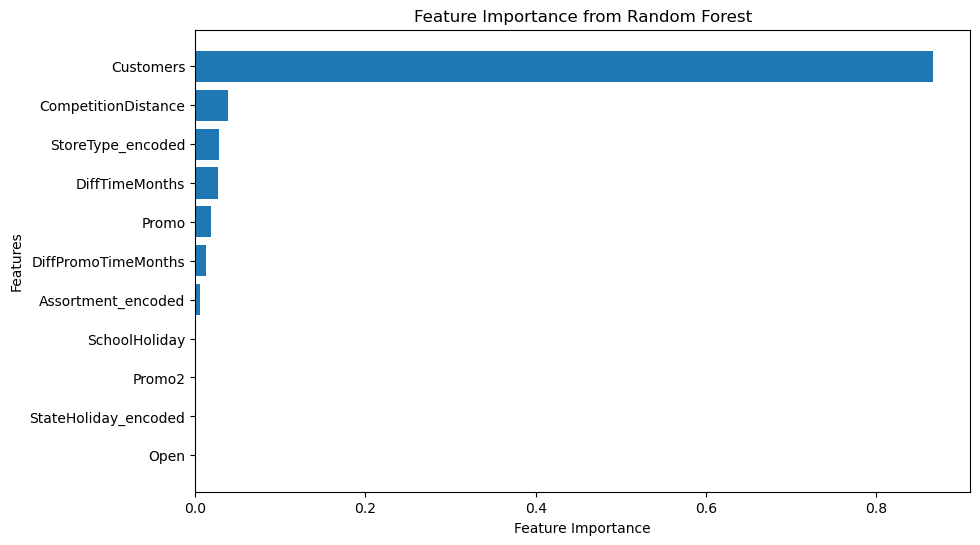

                 Feature  Importance
0              Customers    0.866770
4    CompetitionDistance    0.038673
9      StoreType_encoded    0.027956
6         DiffTimeMonths    0.027030
2                  Promo    0.018630
7    DiffPromoTimeMonths    0.012288
10    Assortment_encoded    0.006138
3          SchoolHoliday    0.001297
5                 Promo2    0.001094
8   StateHoliday_encoded    0.000125
1                   Open    0.000000


In [139]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

# Display the ranked features
print(feature_importances)